# eDreams test for Data Scientist Role

*__Author:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*

# Index

1. [Imports](#1)   

2. [EDA & Data Cleaning](#2) <br>
    3.1 [Duplicate Check](#2.1)    
    3.2 [Target Variable Transformation](#2.2)    
    3.3 [Validation Strategy](#2.3)    
    3.4 [Data Cleaning & Transformation](#2.4)   
    3.5 [Dates conversion](#2.5)    
    3.6 [Label Encoding / One Hot Encoding](#2.6)    
     
3. [Feature Engineering](#3)    
    3.1 [Timing Features](#3.1)    
    
4. [Oversampling](#4)

5. [Modeling](#5)    
    5.1 [Setting K folds](#5.1)        
    5.2 [Parameter tunning](#5.2)       
    5.4 [Get the id column](#5.3)  

6. [Submission](#6) 

<a id="1"></a>
### Imports

In [57]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# For oversampling
from imblearn.over_sampling import SMOTE;

# Figures inline and set visualization style
%matplotlib inline
sns.set() #Different type of visualization

# Visualization
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks as cf
cf.getThemes();
cf.go_offline()
cf.set_config_file(world_readable=True, theme='polar')
import plotly.graph_objs as go
import plotly
from plotly import tools
from termcolor import colored

# Layout for plotly plots
layout1 = cf.Layout(
    height=400,
    width=900
)

# import the necessary modelling algorithms

# Classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Gradient Boosting
import xgboost as xgb

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,PolynomialFeatures

# Evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

# Show multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

<a id="2"></a>
### EDA & Data Cleaning

In [3]:
# We import the data
df_train = pd.read_csv('input/train.csv', sep = ';',  decimal=',') # we specify the decimal argument in 
df_test = pd.read_csv('input/test.csv', sep = ';',  decimal=',')   # order for floats to be read properly

# We take a look at the dataset to see that data was imported correctly
df_train.head()
df_test.head()

,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
0,0,01/July,EDES,1,22/July,25/July,1,0,0,False,DOMESTIC,628.844,TABLET,ROUND_TRIP,TRIP,True,False,0
1,1,01/July,EDIT,0,29/July,29/July,1,0,0,False,CONTINENTAL,1281.430,SMARTPHONE,ONE_WAY,TRIP,False,False,1
2,2,01/July,OPUK,2,29/July,19/August,1,0,0,False,CONTINENTAL,1730.350,TABLET,ROUND_TRIP,TRIP,True,False,0
3,3,01/July,OPIT,0,24/July,04/August,1,0,0,False,DOMESTIC,652.702,SMARTPHONE,MULTI_DESTINATION,TRIP,False,False,2
4,4,01/July,EDES,0,11/August,11/August,1,0,0,False,CONTINENTAL,1717.850,COMPUTER,ONE_WAY,TRIP,False,False,1


,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,NO_GDS
0,0,03/July,EDES,1,22/July,22/July,1,0,0,False,DOMESTIC,3425.95,COMPUTER,ONE_WAY,TRIP,True,0
1,1,03/July,GOFR,1,05/July,22/August,1,0,0,False,INTERCONTINENTAL,3206.92,SMARTPHONE,ROUND_TRIP,TRIP,False,0
2,2,03/July,OPGB,1,22/July,12/August,1,0,0,False,INTERCONTINENTAL,6605.22,COMPUTER,ROUND_TRIP,TRIP,False,0
3,3,03/July,EDUK,0,06/July,08/July,1,0,0,False,CONTINENTAL,1302.29,SMARTPHONE,ROUND_TRIP,TRIP,False,2
4,4,03/July,OPDE,1,10/September,10/September,1,0,0,False,INTERCONTINENTAL,6770.78,COMPUTER,ONE_WAY,TRIP,True,0


In [4]:
df_train.tail()

,ID,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
49995,49995,02/July,EDUK,1,02/July,02/July,2,0,0,False,CONTINENTAL,1035.13,COMPUTER,ONE_WAY,TRIP,True,True,0
49996,49996,02/July,EDPT,1,11/August,19/August,2,1,0,False,CONTINENTAL,1152.20,SMARTPHONE,ROUND_TRIP,TRIP,True,False,0
49997,49997,02/July,GOFR,1,09/September,23/September,1,0,0,False,INTERCONTINENTAL,2236.54,SMARTPHONE,ROUND_TRIP,TRIP,False,False,0
49998,49998,02/July,EDPT,2,05/July,21/July,1,0,0,False,CONTINENTAL,1312.48,COMPUTER,ROUND_TRIP,TRIP,False,True,0
49999,49999,02/July,GOFR,0,06/July,06/July,1,0,0,False,INTERCONTINENTAL,2403.31,SMARTPHONE,ONE_WAY,TRIP,False,False,1


In [5]:
# Let's check the number of rows and columns of train and test
print('We have {} training rows and {} test rows.'.format(df_train.shape[0], df_test.shape[0]))
print('We have {} training columns and {} test columns.'.format(len(df_train.columns), len(df_test.columns))) 

We have 50000 training rows and 30000 test rows.
We have 18 training columns and 17 test columns.


In [6]:
# We take a first look at the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
ID               50000 non-null int64
TIMESTAMP        50000 non-null object
WEBSITE          50000 non-null object
GDS              50000 non-null int64
DEPARTURE        50000 non-null object
ARRIVAL          50000 non-null object
ADULTS           50000 non-null int64
CHILDREN         50000 non-null int64
INFANTS          50000 non-null int64
TRAIN            50000 non-null bool
HAUL_TYPE        50000 non-null object
DISTANCE         50000 non-null float64
DEVICE           49867 non-null object
TRIP_TYPE        50000 non-null object
PRODUCT          50000 non-null object
SMS              50000 non-null bool
EXTRA_BAGGAGE    50000 non-null bool
NO_GDS           50000 non-null int64
dtypes: bool(3), float64(1), int64(6), object(8)
memory usage: 5.9+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
ID           30000 non-null int64
TIMESTAMP    30000 non-null object
WEBSITE      30000 non-null object
GDS          30000 non-null int64
DEPARTURE    30000 non-null object
ARRIVAL      30000 non-null object
ADULTS       30000 non-null int64
CHILDREN     30000 non-null int64
INFANTS      30000 non-null int64
TRAIN        30000 non-null bool
HAUL_TYPE    30000 non-null object
DISTANCE     30000 non-null float64
DEVICE       29948 non-null object
TRIP_TYPE    30000 non-null object
PRODUCT      30000 non-null object
SMS          30000 non-null bool
NO_GDS       30000 non-null int64
dtypes: bool(2), float64(1), int64(6), object(8)
memory usage: 3.5+ MB


We can see we have some missing values in the `DEVICE` column in the train dataset. Later on we will decide what to do with them. <br>

Regarding the `ID` column. It tells us the same as the index from our dataframe, hence it's not giving us any extra information and because of all the entries are independent between each other we can safely drop it.

In [8]:
# We drop the ID column both in the train & test datset
df_train = df_train.drop('ID',axis=1)
df_test = df_test.drop('ID',axis=1)

In [9]:
df_train.head()
df_test.head()

,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
0,01/July,EDES,1,22/July,25/July,1,0,0,False,DOMESTIC,628.844,TABLET,ROUND_TRIP,TRIP,True,False,0
1,01/July,EDIT,0,29/July,29/July,1,0,0,False,CONTINENTAL,1281.430,SMARTPHONE,ONE_WAY,TRIP,False,False,1
2,01/July,OPUK,2,29/July,19/August,1,0,0,False,CONTINENTAL,1730.350,TABLET,ROUND_TRIP,TRIP,True,False,0
3,01/July,OPIT,0,24/July,04/August,1,0,0,False,DOMESTIC,652.702,SMARTPHONE,MULTI_DESTINATION,TRIP,False,False,2
4,01/July,EDES,0,11/August,11/August,1,0,0,False,CONTINENTAL,1717.850,COMPUTER,ONE_WAY,TRIP,False,False,1


,TIMESTAMP,WEBSITE,GDS,DEPARTURE,ARRIVAL,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,NO_GDS
0,03/July,EDES,1,22/July,22/July,1,0,0,False,DOMESTIC,3425.95,COMPUTER,ONE_WAY,TRIP,True,0
1,03/July,GOFR,1,05/July,22/August,1,0,0,False,INTERCONTINENTAL,3206.92,SMARTPHONE,ROUND_TRIP,TRIP,False,0
2,03/July,OPGB,1,22/July,12/August,1,0,0,False,INTERCONTINENTAL,6605.22,COMPUTER,ROUND_TRIP,TRIP,False,0
3,03/July,EDUK,0,06/July,08/July,1,0,0,False,CONTINENTAL,1302.29,SMARTPHONE,ROUND_TRIP,TRIP,False,2
4,03/July,OPDE,1,10/September,10/September,1,0,0,False,INTERCONTINENTAL,6770.78,COMPUTER,ONE_WAY,TRIP,True,0


<a id="2.1"></a>
###### Duplicate Check

Let's check if there are any duplicates.

In [10]:
# We check if we have duplicates
df_train.duplicated().any()
df_test.duplicated().any()

True

True

It looks like we have no duplicates on the dataset, so one problem less!

<a id="2.2"></a>
###### Null / NaN Handling

Let's treat the `null` values we saw we had in the `DEVICE` column. <br>
We will see how many `null` there are and we will take a decision about what to do with them.

In [11]:
# Values that the feature DEVICE can take
df_train['DEVICE'].unique()
df_test['DEVICE'].unique()

array(['TABLET', 'SMARTPHONE', 'COMPUTER', 'OTHER', nan], dtype=object)

array(['COMPUTER', 'SMARTPHONE', 'TABLET', 'OTHER', nan], dtype=object)

In [12]:
num_instances_train = 50000 # total number of instances in the train daataset
num_instances_test = 30000 # total number of instances in the test daataset

# For the train dataset
df_train['DEVICE'].value_counts() # number of each type of device, without the NaN values
print('Number of NaN values in the train dataset = ' + str(num_instances_train - df_train['DEVICE'].value_counts().sum()))

# For the test dataset
df_test['DEVICE'].value_counts() # number of each type of device, without the NaN values
print('Number of NaN values in the test dataset = ' + str(num_instances_test - df_test['DEVICE'].value_counts().sum()))

COMPUTER      34064
SMARTPHONE    11709
TABLET         3152
OTHER           942
Name: DEVICE, dtype: int64

Number of NaN values in the train dataset = 133


COMPUTER      20438
SMARTPHONE     6531
TABLET         2352
OTHER           627
Name: DEVICE, dtype: int64

Number of NaN values in the test dataset = 52


As we can observe that the amount of missing values it's ridiculously small. <br>
So here we have two different options: <br>

    1) Drop those null values
    2) Fill them with the most common value which is COMPUTER
    
As the amount is so small, we better just drop them, that way we do not blur the rest of the data and get it dirtier, eventhough the amount is so small that if we entered them as `COMPUTER` it would not affect to much to our data, but it's better to drop them

In [13]:
# We drop those values in the train & test dataset
df_train = df_train.dropna(subset=['DEVICE'])
df_test= df_test.dropna(subset=['DEVICE'])

In [14]:
# Let's check that it has been done properly
df_train['DEVICE'].unique()
df_test['DEVICE'].unique()

array(['TABLET', 'SMARTPHONE', 'COMPUTER', 'OTHER'], dtype=object)

array(['COMPUTER', 'SMARTPHONE', 'TABLET', 'OTHER'], dtype=object)

As we can observe, we do not have NaN values anymore, great!

DEVICE
COMPUTER      34064
OTHER           942
SMARTPHONE    11709
TABLET         3152
Name: WEBSITE, dtype: int64

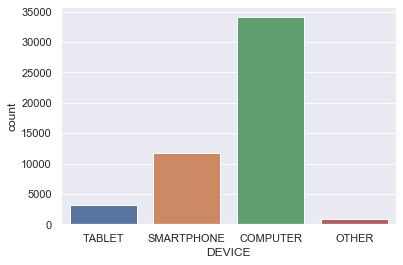

In [15]:
# Let's plot the amount of device types who enter the website
sns.countplot(x = 'DEVICE', data = df_train)
df_train.groupby(['DEVICE']).WEBSITE.count() # Device type who enter the website

As we can see, much more people access the website via the computer rather than the phone or tablet.

<a id="2.1"></a>
###### Dates Conversion

As we saw before, our dates were `object` type. We will convert them into `datetime` type. <br>
Here we find a problem. <br>
Our dates have a day and a month respectively `01/July` for example, while the year is missing. This leads to a problem when trying to convert the dates as it will introduce a year by its own (year 1900). Hence, we have to come up with something to treat our dates and make them useful: <br>

- Are all dates in the same year?

    If they were not from the same year we could do some comparatives based on months of different years, or seasons,     for example, but as we do not know if they are from the same year we can't do this type of analysis.
    If they were from the same year we could just take into account months and days and do the analysis based only on     those two.
    
    
- Assuming they are all from the same year

    The easiest and the one which makes more sense here is to assume all of them are from the same year (1900    example, as it filled by default with `to_datetime` method from `pandas` library), just to fill the year in the format, so we are able to convert them to datetime format and then proceed with the analysis of this dates taking into account only the day and the month, forgetting about the year.

Before doing all this, there are some dates that do not have the same format as the rest. <br>
While most the dates have dd/M format (04/July), there are some that have dd-m format (17-may). This leads to problems when converting the dates. 

Let's replace the `-` symbols with `/` so all the dates have the same format.

In [16]:
# We replace the symbols in both datasets and in all the columns dates just in case

# train dataset
df_train['TIMESTAMP'] = df_train['TIMESTAMP'].str.replace('-', '/')
df_train['DEPARTURE'] = df_train['DEPARTURE'].str.replace('-', '/')
df_train['ARRIVAL'] = df_train['ARRIVAL'].str.replace('-', '/')

#test dataset
df_test['TIMESTAMP'] = df_test['TIMESTAMP'].str.replace('-', '/')
df_test['DEPARTURE'] = df_test['DEPARTURE'].str.replace('-', '/')
df_test['ARRIVAL'] = df_test['ARRIVAL'].str.replace('-', '/')

In [17]:
# Let's look at 1 register
x = df_train['TIMESTAMP'][0]
x

'01/July'

In [18]:
# We convert them to datetime type

# for the train dataset
df_train['TIMESTAMP'] = pd.to_datetime(df_train['TIMESTAMP'], format='%d/%B')
df_train['DEPARTURE'] = pd.to_datetime(df_train['DEPARTURE'], format='%d/%B')
df_train['ARRIVAL'] = pd.to_datetime(df_train['ARRIVAL'], format='%d/%B')

#for the test dataset
df_test['TIMESTAMP'] = pd.to_datetime(df_test['TIMESTAMP'], format='%d/%B')
df_test['DEPARTURE'] = pd.to_datetime(df_test['DEPARTURE'], format='%d/%B')
df_test['ARRIVAL'] = pd.to_datetime(df_test['ARRIVAL'], format='%d/%B')

In [19]:
# We take a look to see that it has been done properly
x = df_train['DEPARTURE'][2]
y = df_test['ARRIVAL'][2]
x
y

Timestamp('1900-07-29 00:00:00')

Timestamp('1900-08-12 00:00:00')

In [20]:
df_train.dtypes

TIMESTAMP        datetime64[ns]
WEBSITE                  object
GDS                       int64
DEPARTURE        datetime64[ns]
ARRIVAL          datetime64[ns]
ADULTS                    int64
CHILDREN                  int64
INFANTS                   int64
TRAIN                      bool
HAUL_TYPE                object
DISTANCE                float64
DEVICE                   object
TRIP_TYPE                object
PRODUCT                  object
SMS                        bool
EXTRA_BAGGAGE              bool
NO_GDS                    int64
dtype: object

As we can see our dates are `datetime` type, so we can now proceed with the analysis and use them.

<a id="3.6"></a>
#### Label Encoding / One Hot Encoding

Most of the features in our dataset are categorical, for example: `WEBSITE` has values like `EDES, GOFT, EDUK, ...` and `DEVICE` has values such as `COMPUTER, SMARTPHONE, ...` for instance. <br>
We need to label this data in order to assign a number to each category, this is converting our categorical data into numerical data so our model can handle it.

In [21]:
train_categoricals = df_train.select_dtypes(include='object').columns
test_categoricals = df_test.select_dtypes(include='object').columns

# Train Categoricals
for c in train_categoricals:
    try:
        lbl = LabelEncoder();
        lbl.fit(list(df_train[c].values));
        df_train[c] = lbl.transform(list(df_train[c].values));
    except:
        print(df_train[column].dtype) 

# Test Categoricals
for c in test_categoricals:
    try:
        lbl = LabelEncoder();
        lbl.fit(list(df_test[c].values));
        df_test[c] = lbl.transform(list(df_test[c].values));
    except:
        print(df_train[column].dtype) 

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

# Encogind for the train dataset
for column in df_train.columns:
    if df_train[column].dtype == type(object):
        try:
            le = LabelEncoder()
            df_train[column] = le.fit_transform(df_train[column])
        except:
            print(df_train[column].dtype) 


# Encoding for the test dataset        
for column in df_test.columns:
    if df_test[column].dtype == type(object):
        le = LabelEncoder()
        df_test[column] = le.fit_transform(df_test[column])

In [22]:
# We check that it has been done properly
df_train.dtypes
df_test.dtypes

TIMESTAMP        datetime64[ns]
WEBSITE                   int64
GDS                       int64
DEPARTURE        datetime64[ns]
ARRIVAL          datetime64[ns]
ADULTS                    int64
CHILDREN                  int64
INFANTS                   int64
TRAIN                      bool
HAUL_TYPE                 int64
DISTANCE                float64
DEVICE                    int64
TRIP_TYPE                 int64
PRODUCT                   int64
SMS                        bool
EXTRA_BAGGAGE              bool
NO_GDS                    int64
dtype: object

TIMESTAMP    datetime64[ns]
WEBSITE               int64
GDS                   int64
DEPARTURE    datetime64[ns]
ARRIVAL      datetime64[ns]
ADULTS                int64
CHILDREN              int64
INFANTS               int64
TRAIN                  bool
HAUL_TYPE             int64
DISTANCE            float64
DEVICE                int64
TRIP_TYPE             int64
PRODUCT               int64
SMS                    bool
NO_GDS                int64
dtype: object

In the same way that we have done the encoding for the `object` type data above, we have to encode the `boolean` data too, giving them values of {0 or 1} respectively.

In [23]:
# For the train dataset
for column in df_train.columns:
    if df_train[column].dtypes.name == 'bool':
        try:
            df_train[column] = df_train[column].astype(int)
        except:
            print(column)

# For the test dataset
for column in df_test.columns:
    if df_test[column].dtypes.name == 'bool':
        try:
            df_test[column] = df_test[column].astype(int)
        except:
            print(column)

In [24]:
# We check that it has been done properly
df_train.SMS.unique()
df_train.EXTRA_BAGGAGE.unique()
df_train.TRAIN.unique()

df_test.SMS.unique()
df_test.TRAIN.unique()

array([1, 0])

array([0, 1])

array([0, 1])

array([1, 0])

array([0, 1])

In [ ]:
g = sns.pairplot(df_train, vars=['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
       'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
       'TRIP_TYPE', 'PRODUCT', 'SMS', 'NO_GDS'], hue='EXTRA_BAGGAGE')
plt.show(g)

<a id="3.1"></a>
#### Outliers Check

In [25]:
df_train.describe()

,WEBSITE,GDS,ADULTS,CHILDREN,INFANTS,TRAIN,HAUL_TYPE,DISTANCE,DEVICE,TRIP_TYPE,PRODUCT,SMS,EXTRA_BAGGAGE,NO_GDS
count,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000,49867.000000
mean,29.179036,0.641466,1.488640,0.098322,0.017647,0.005394,0.744200,2199.907382,0.678124,1.566888,0.980829,0.496942,0.196503,0.592917
std,15.641874,0.582309,0.828472,0.388153,0.133481,0.073249,0.844566,2558.150658,1.033030,0.576371,0.137127,0.499996,0.397357,0.642457
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,788.826000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1318.130000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,45.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2110.650000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,59.000000,4.000000,9.000000,5.000000,2.000000,1.000000,2.000000,19766.100000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000


In [26]:
df_train.columns

Index(['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
       'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
       'TRIP_TYPE', 'PRODUCT', 'SMS', 'EXTRA_BAGGAGE', 'NO_GDS'],
      dtype='object')

There are some columns where there is no need to check for outliers, such as all the dates columns, or the ones who consists on boolean values. <br>
Also some columns like `DISTANCE` will be studied separately as the distribution of that data will make the plot harder to interpret (as data is not normalized/standarized and values dismatch from the rest of the columns).

In [27]:
# We remove the not needed columns
df_ = df_train.drop(['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
                     'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
                     'TRIP_TYPE', 'PRODUCT', 'SMS', 'EXTRA_BAGGAGE', 'NO_GDS'])

KeyError: "['TIMESTAMP' 'WEBSITE' 'GDS' 'DEPARTURE' 'ARRIVAL' 'ADULTS' 'CHILDREN'\n 'INFANTS' 'TRAIN' 'HAUL_TYPE' 'DISTANCE' 'DEVICE' 'TRIP_TYPE' 'PRODUCT'\n 'SMS' 'EXTRA_BAGGAGE' 'NO_GDS'] not found in axis"

In [ ]:
sns.catplot(data=df_outliers,kind='box',height=10,aspect=2, palette="GnBu_d");

Let's take a look at the `DISTANCE` column:

In [28]:
# LEt's get some information about how the data is distributed (mean, min, max, etc.)
df_train['DISTANCE'].describe()

count    49867.000000
mean      2199.907382
std       2558.150658
min          0.000000
25%        788.826000
50%       1318.130000
75%       2110.650000
max      19766.100000
Name: DISTANCE, dtype: float64

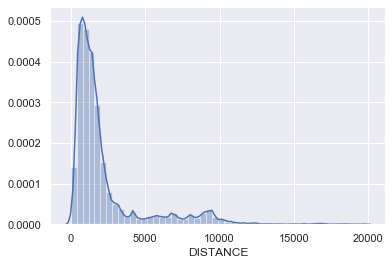

In [29]:
sns.distplot(df_train['DISTANCE']);

As we can see the number of long distance trips is minimal, compared to the "short" ones. Here we have to take into account that the mean distance of the trips is 2199.90. <br>
Can we consider some of those long distance trips as outliers and drop them...? <br>
Let's first find out if the distance has any consecuences with getting extra baggage or not:

In [30]:
# Histogram to check the distribution
df_train['DISTANCE'].iplot(kind='hist', bins=100, xTitle='Distance', linecolor='black', 
                           yTitle='count', title='Histogram of Distance', layout=layout1)

In [31]:
plot_complt_total = sns.barplot(x='EXTRA_BAGGAGE', y='DISTANCE', data = pd.melt(df_train)  ,palette="GnBu_d");
plot_complt_total.set(xlabel = '', ylabel= 'Distance VS Extra Baggage');


ValueError: Could not interpret input 'EXTRA_BAGGAGE'

In [32]:
df_train['DISTANCE'].plot(kind='scatter',x='distance',y='value')
plt.show()

ValueError: plot kind scatter can only be used for data frames

In [ ]:
# We create a dataframe with all the data except the dates columns
df_no_dates = df_train.drop(['TIMESTAMP', 'DEPARTURE', 'ARRIVAL'], axis=1)

<a id="3.1"></a>
#### Correlation Check

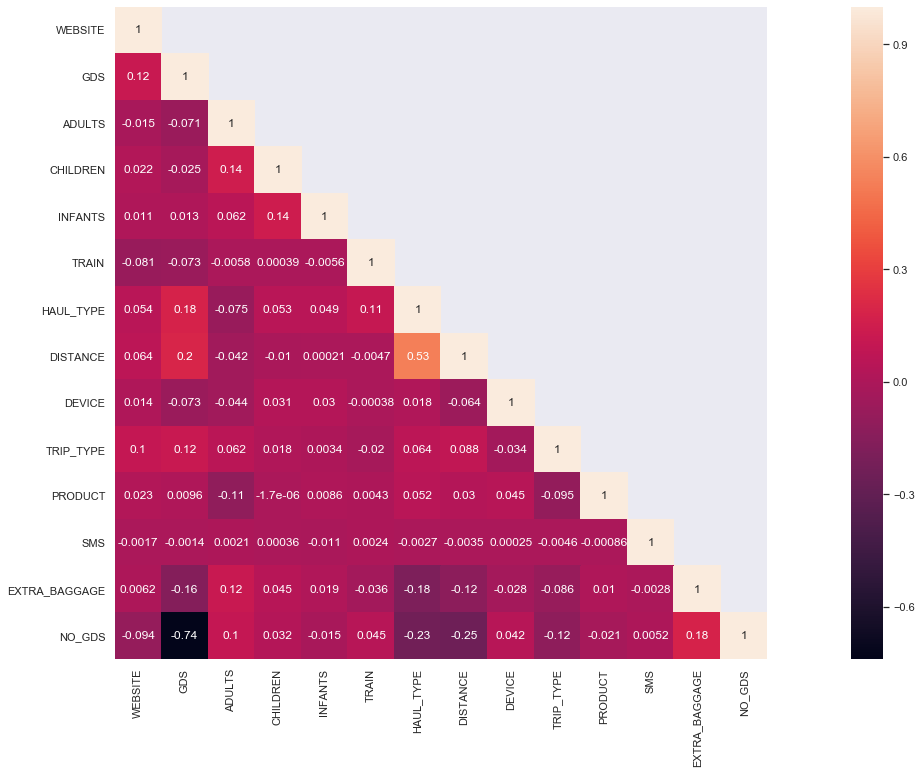

In [33]:
# Correlation Matrix
cor_mat= df_train.corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False

fig=plt.gcf()
fig.set_size_inches(30,12)

sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

We do not have correlated features.

Let's check if we are facing a balanced dataset:

In [34]:
df_train['EXTRA_BAGGAGE'].value_counts()

0    40068
1     9799
Name: EXTRA_BAGGAGE, dtype: int64

As we can see we are facing a desbalanced dataset. <br>
We will handle this situation further on the following section.

In [35]:
df_train.columns

Index(['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
       'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
       'TRIP_TYPE', 'PRODUCT', 'SMS', 'EXTRA_BAGGAGE', 'NO_GDS'],
      dtype='object')

In [ ]:
x_train = df_train.drop('EXTRA_BAGGAGE', axis=1)
y_train = df_train.drop(['TIMESTAMP', 'WEBSITE', 'GDS', 'DEPARTURE', 'ARRIVAL', 'ADULTS',
                    'CHILDREN', 'INFANTS', 'TRAIN', 'HAUL_TYPE', 'DISTANCE', 'DEVICE',
                    'TRIP_TYPE', 'PRODUCT', 'SMS', 'NO_GDS'], axis=1)

<a id="5"></a>
### 5. Oversampling

As we have a desbalanced dataset, we will use oversampling in order to balance the classes. <br>

*The technique that we are going tu use it's called SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) (https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html).*

What this technique does is create instances and registers of the class with fewer instance in an "intelligent" way. But taking into account categorical features, unlike SMOTE that will create values such as 0.65 for example when varibles take values of 0 or 1. 

In [ ]:
# We initialize SMOTE
smt = SMOTE()

# We apply oversampling in our train dataset
x_train, y_train = smt.fit_sample(x_train, y_train)

In [ ]:
# Let's check the amount of records in each class
y_train['EXTRA_BAGGAGE'].value_counts()

<a id="4"></a>
### 4. Modeling

In [36]:
# We define de label
y_label = df_train['EXTRA_BAGGAGE']

The last thing to do before modeling needs to be dropping the columns that take datetime as a type input as XGBoost its not good with non numerican features. 

In [37]:
x_train = df_train.drop(['TIMESTAMP', 'DEPARTURE', 'ARRIVAL', 'EXTRA_BAGGAGE'], axis=1)
x_test = df_test.drop(['TIMESTAMP', 'DEPARTURE', 'ARRIVAL'], axis=1)

Let's check both the train & test shapes are ok:

In [38]:
x_train.shape
x_test.shape

(49867, 13)

(29948, 13)

In [39]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_label, test_size = 0.25, random_state = 0)

<a id="5.1"></a>
##### 5.1 Setting K folds

In [40]:
# Setting a 5-fold stratified cross-validation (note: shuffle=True)
skf = KFold(n_splits=5, shuffle=True, random_state=8)

<a id="5.2"></a>
##### 5.2 Parameter tunning

In [41]:
# Parameters for the model
params = {'booster' : 'gbtree',
          #'nthread' : 5,
          'objective' : 'binary:logistic',
          'eval_metric' : 'auc', 
          'max_depth' : 8,
          'eta' : 0.3,
          'subsample' : 0.7, 
          'colsample_bytree' : 0.7 
        }

In [52]:
# XGB Matrix Creation
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)

In [45]:
res = xgb.cv(params, dtrain, num_boost_round = 4000, folds=skf,
             seed=2019, early_stopping_rounds = 10, verbose_eval=True)
#params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200

[0]	train-auc:0.70636+0.00285	test-auc:0.68571+0.00784
[1]	train-auc:0.73699+0.00893	test-auc:0.71332+0.01495
[2]	train-auc:0.75369+0.00526	test-auc:0.72400+0.00883
[3]	train-auc:0.76279+0.00538	test-auc:0.72915+0.00740
[4]	train-auc:0.76784+0.00349	test-auc:0.73101+0.00848
[5]	train-auc:0.77190+0.00415	test-auc:0.73312+0.00924
[6]	train-auc:0.77642+0.00322	test-auc:0.73378+0.00936
[7]	train-auc:0.78145+0.00392	test-auc:0.73558+0.00973
[8]	train-auc:0.78374+0.00394	test-auc:0.73611+0.00953
[9]	train-auc:0.78737+0.00325	test-auc:0.73812+0.00937
[10]	train-auc:0.79067+0.00404	test-auc:0.73863+0.01007
[11]	train-auc:0.79414+0.00254	test-auc:0.73980+0.01047
[12]	train-auc:0.79615+0.00223	test-auc:0.74069+0.01061
[13]	train-auc:0.79906+0.00263	test-auc:0.74130+0.01033
[14]	train-auc:0.80151+0.00251	test-auc:0.74247+0.01053
[15]	train-auc:0.80333+0.00324	test-auc:0.74304+0.01046
[16]	train-auc:0.80585+0.00413	test-auc:0.74363+0.01083
[17]	train-auc:0.80720+0.00433	test-auc:0.74421+0.01012
[1

In [46]:
best_round=[i for i, e in enumerate(res['test-auc-mean']) if e == min(res['test-auc-mean'])][0]

In [47]:
best_round

0

In [48]:
res.iloc[best_round]

train-auc-mean    0.706355
train-auc-std     0.002845
test-auc-mean     0.685707
test-auc-std      0.007835
Name: 0, dtype: float64

In [49]:
# We train the model with the best round
model = xgb.train(params = params, dtrain = dtrain, num_boost_round = best_round)

In [50]:
xgb.plot_importance(model,height=0.2,max_num_features=20);

ValueError: Booster.get_score() results in empty

In [51]:
# We save the model
model.save_model('output/xgb_model_1.model')

##### Predicting

In [53]:
y_pred = model.predict(dval)

In [58]:
# We make the Confusion Matrix
cm = confusion_matrix(y_val, (y_pred > 0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)

The Confusion Matrix is:  
 [[9990    0]
 [2477    0]]


In [59]:
# Calculate the accuracy on test set
predict_accuracy_test = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on the test set is: ', 'blue'), colored(predict_accuracy_test, 'blue'))

The Accuracy on the test set is:  0.8013154728483196


## Greetings

I wanted to finish this test by giving thanks for the opportunity to work in such an amazing company that I have been looking up for many years now.<br>
It would be like a dream to be part of such an amazing project as I have been and it would be great to . <br>
I hope I left a good impresion and you take me into account for this position. 

I look forward to hearing from you.

Kind regards,

Tomas Ruan

*__Author:__ Tomas Ruan Rollan*
<br>
*__LinkedIn:__ https://www.linkedin.com/in/tomas-ruan/*
<br>
*__Email:__ tomruarol@gmail.com*